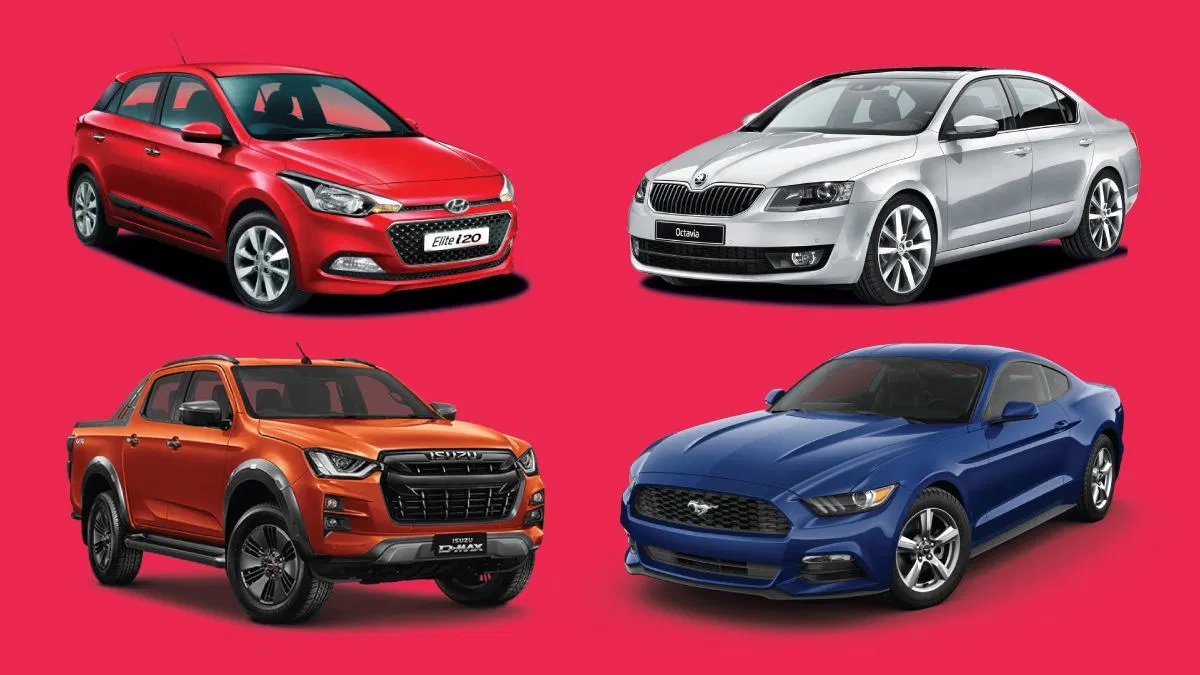

<html>
<head>
  <style>
    body {
      font-family: sans-serif;
      line-height: 1.5;
      padding: 10px;
    }

    h2 {
      font-size: 1.2em;
      margin-bottom: 0.5em;
    }

    .description {
      font-style: italic;
      color: #888;
    }

    .example {
      font-weight: bold;
      margin-bottom: 5px;
    }
  </style>
</head>
<body>
  <p style='font-size: 2.5em; margin-bottom: 0.5em;'>Data Description</p>
  <p>The dataset contains a collection of car images. The images are labeled with various car body types, including Hatchback, SUV, Sedan, Truck, Sport, and Van.</p>
  
  <p style='font-size: 2.5em; margin-bottom: 0.5em;'>Model</p>
  <p>This notebook details the development of an image classification model using convolutional neural networks (CNNs). This model aims to:</p>
  <ul>
    <li>Identify the car body type in a given image.</li>
  </ul>
  
  <p style='font-size: 2.5em; margin-bottom: 0.5em;'>Features:</p>
  <ul>
    <li><strong>Image:</strong> The actual image of the car to be classified.</li>
    <li><strong>Label:</strong> The ground truth car body type, which could be one of the following: Hatchback, SUV, Sedan, Truck, Sport, or Van.</li>
  </ul>
  
  <p><strong>Dataset Size:</strong> 4,344 images</p>
  
  <p style='font-size: 2.5em; margin-bottom: 0.5em;'>Objective:</p>
  <p>The primary goal of this model is to accurately classify the car body type in each image. This task involves using transfer learning and data augmentation to improve accuracy and generalize well across diverse images of different car types.</p>
</body>
</html>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV fil"e I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/alaawaelmo/car-body-classification/Cars_Body_Type/valid/VAN/7f68f469b94e02e1e75834ebba952d26.jpg
/kaggle/input/d/alaawaelmo/car-body-classification/Cars_Body_Type/valid/VAN/18b02976-6fd5-4d68-9d9a-203949be2bb8.jpeg
/kaggle/input/d/alaawaelmo/car-body-classification/Cars_Body_Type/valid/VAN/8a08fe8ca64dc34d2c44c5100625359d.jpg
/kaggle/input/d/alaawaelmo/car-body-classification/Cars_Body_Type/valid/VAN/3bcc3f74371b3048cac65e9a5ea95572.jpg
/kaggle/input/d/alaawaelmo/car-body-classification/Cars_Body_Type/valid/VAN/202105182763154_jpg.rf.d3a64c8cb26b96bda29cf71e2038c19e.jpg
/kaggle/input/d/alaawaelmo/car-body-classification/Cars_Body_Type/valid/VAN/04728_Dodge-Sprinter-Cargo-Van-2009_jpg.rf.6ad32dbebc970208b5acb327d20a0e13.jpg
/kaggle/input/d/alaawaelmo/car-body-classification/Cars_Body_Type/valid/VAN/26_jpg.rf.40b33303369196c8f37402b26a61a8fb.jpg
/kaggle/input/d/alaawaelmo/car-body-classification/Cars_Body_Type/valid/VAN/202106023372060_jpg.rf.4a79ec7ef61a5f393acdb531d5f1b

# <a id="Import"></a>
# <p style="background-color: #686D76; font-family: 'Copperplate'; color:#F5F5F5; font-size:140%; text-align:center; border-radius:1000px 10px;"> Importing Libraries</p> 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
import os
import cv2
import random
import glob

# <a id="Import"></a>
# <p style="background-color: #686D76; font-family: 'Copperplate'; color:#F5F5F5; font-size:140%; text-align:center; border-radius:1000px 10px;"> Explore Images</p> 

In [3]:
train_path='/kaggle/input/d/alaawaelmo/car-body-classification/Cars_Body_Type/train'
test_path='/kaggle/input/d/alaawaelmo/car-body-classification/Cars_Body_Type/test'
valid_path='/kaggle/input/d/alaawaelmo/car-body-classification/Cars_Body_Type/valid'

In [4]:
os.listdir(train_path)

['VAN', 'SUV', 'Truck', 'Sport', 'Sedan', 'Hatchback']

In [5]:
img_size=[]
for folder in os.listdir(train_path):
  folder_path=glob.glob(train_path+'/'+folder+'/*')
  for img_path in folder_path:
    img=plt.imread(img_path)
    img_size.append(img.shape)


In [6]:
pd.Series(img_size).value_counts()

(550, 550, 3)     103
(736, 736, 3)      99
(194, 259, 3)      99
(400, 600, 3)      82
(920, 736, 3)      64
                 ... 
(272, 626, 3)       1
(178, 387, 3)       1
(562, 781, 3)       1
(604, 996, 3)       1
(477, 1294, 3)      1
Name: count, Length: 3145, dtype: int64

In [7]:
pd.Series(img_size).min()

(71, 100, 3)

In [8]:
train_gen=ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_gen=ImageDataGenerator(rescale=1./255)
valid_gen=ImageDataGenerator(rescale=1./255)

In [ ]:
train=train_gen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True,
)
test=test_gen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
)
valid=valid_gen.flow_from_directory(
    valid_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
)

Found 3236 images belonging to 6 classes.
Found 173 images belonging to 6 classes.
Found 935 images belonging to 6 classes.


In [10]:
train.class_indices

{'Hatchback': 0, 'SUV': 1, 'Sedan': 2, 'Sport': 3, 'Truck': 4, 'VAN': 5}

In [11]:
train.image_shape

(224, 224, 3)

In [12]:
len(train)

203

In [13]:
class_labels = {v: k for k, v in train.class_indices.items()}  # Reverse the dictionary
class_labels

{0: 'Hatchback', 1: 'SUV', 2: 'Sedan', 3: 'Sport', 4: 'Truck', 5: 'VAN'}

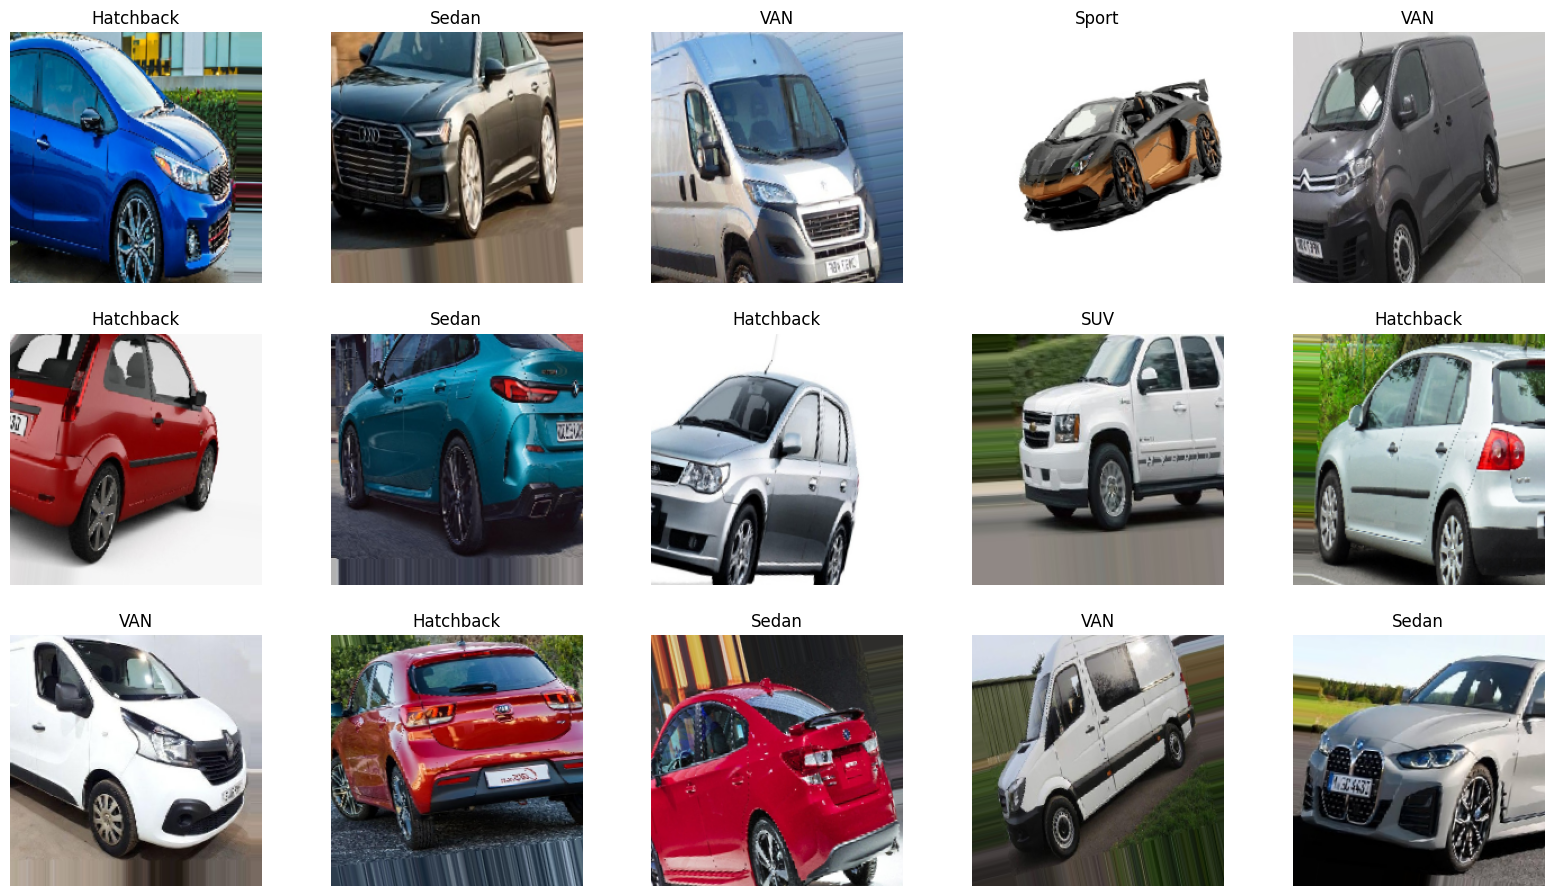

In [14]:
plt.figure(figsize=(20 ,15))
for image_batch, labels_batch in train:
    image = image_batch[1]
    for i in range(1, 16):
        plt.subplot(4, 5, i)
        plt.imshow(image_batch[i])
        label = class_labels[np.argmax(labels_batch[i])]
        plt.title(label)
        plt.axis("off")
    break
    plt.show()

# <a id="Import"></a>
# <p style="background-color: #686D76; font-family: 'Copperplate'; color:#F5F5F5; font-size:140%; text-align:center; border-radius:1000px 10px;"> Modeling</p> 

In [15]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

In [16]:
input_shape = (224, 224, 3)

In [17]:
xception_mode=Xception(weights='imagenet',include_top=False,input_shape=input_shape)
xception_mode.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [18]:
for layer in xception_mode.layers:
      if isinstance(layer, BatchNormalization):
          layer.trainable = True
      else:
          layer.trainable = False

In [19]:
model=Sequential()
x = GlobalAveragePooling2D()(xception_mode.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(6, activation='softmax')(x)
model = Model(inputs=xception_mode.input, outputs=output_layer)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 22,075,566 (84.21 MB)

 Trainable params: 1,268,614 (4.84 MB)

 Non-trainable params: 20,806,952 (79.37 MB)

In [20]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(train,validation_data=valid,epochs=25)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 90/203 ━━━━━━━━━━━━━━━━━━━━ 11:13 6s/step - accuracy: 0.2528 - loss: 1.7184

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


203/203 ━━━━━━━━━━━━━━━━━━━━ 1328s 6s/step - accuracy: 0.3342 - loss: 1.5366 - val_accuracy: 0.7219 - val_loss: 0.7634
Epoch 2/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 1274s 6s/step - accuracy: 0.7000 - loss: 0.7578 - val_accuracy: 0.8642 - val_loss: 0.4112
Epoch 3/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 1289s 6s/step - accuracy: 0.7773 - loss: 0.6011 - val_accuracy: 0.8898 - val_loss: 0.2889
Epoch 4/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 1274s 6s/step - accuracy: 0.8133 - loss: 0.5027 - val_accuracy: 0.8909 - val_loss: 0.3090
Epoch 5/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 1258s 6s/step - accuracy: 0.8434 - loss: 0.4423 - val_accuracy: 0.9102 - val_loss: 0.2457
Epoch 6/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 1291s 6s/step - accuracy: 0.8328 - loss: 0.4571 - val_accuracy: 0.9166 - val_loss: 0.2180
Epoch 7/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 1284s 6s/step - accuracy: 0.8613 - loss: 0.3784 - val_accuracy: 0.9080 - val_loss: 0.2333
Epoch 8/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 1274s 6s/step - accuracy: 0.8688 - loss: 0.3503 - val_accurac

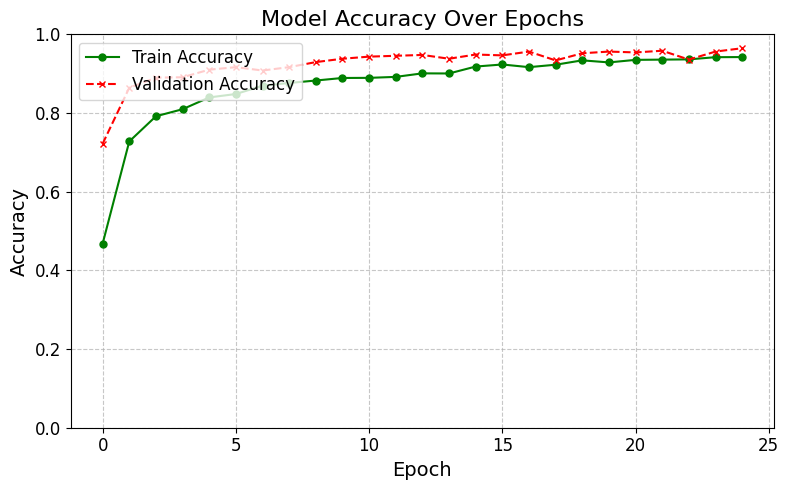

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], color='green', linestyle='-', marker='o', markersize=5, label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='red', linestyle='--', marker='x', markersize=5, label='Validation Accuracy')

plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(loc='upper left', fontsize=12)

plt.ylim(0, 1)

plt.tight_layout()
plt.show()


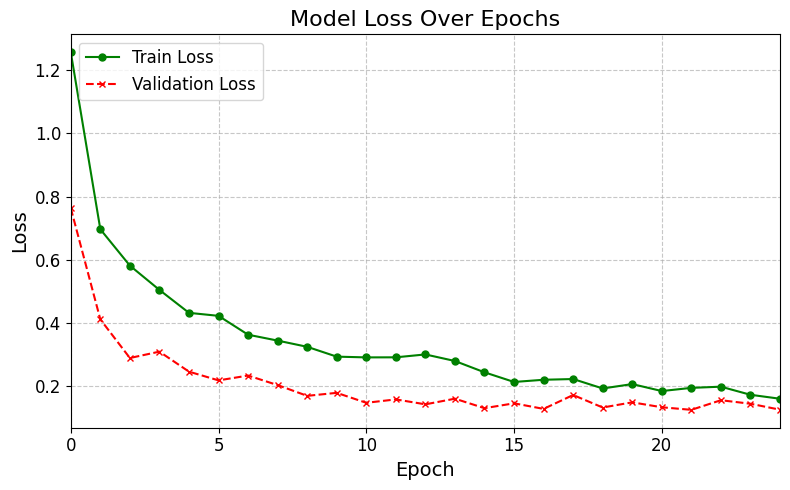

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], color='green', linestyle='-', marker='o', markersize=5, label='Train Loss')
plt.plot(history.history['val_loss'], color='red', linestyle='--', marker='x', markersize=5, label='Validation Loss')

plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(loc='upper left', fontsize=12)

plt.xlim(0, len(history.history['loss']) - 1)

plt.tight_layout()
plt.show()


# <a id="Import"></a>
# <p style="background-color: #686D76; font-family: 'Copperplate'; color:#F5F5F5; font-size:140%; text-align:center; border-radius:1000px 10px;"> Evaluate Test</p> 

In [24]:
model.evaluate(test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9716 - loss: 0.2330


[0.13925525546073914, 0.9768785834312439]

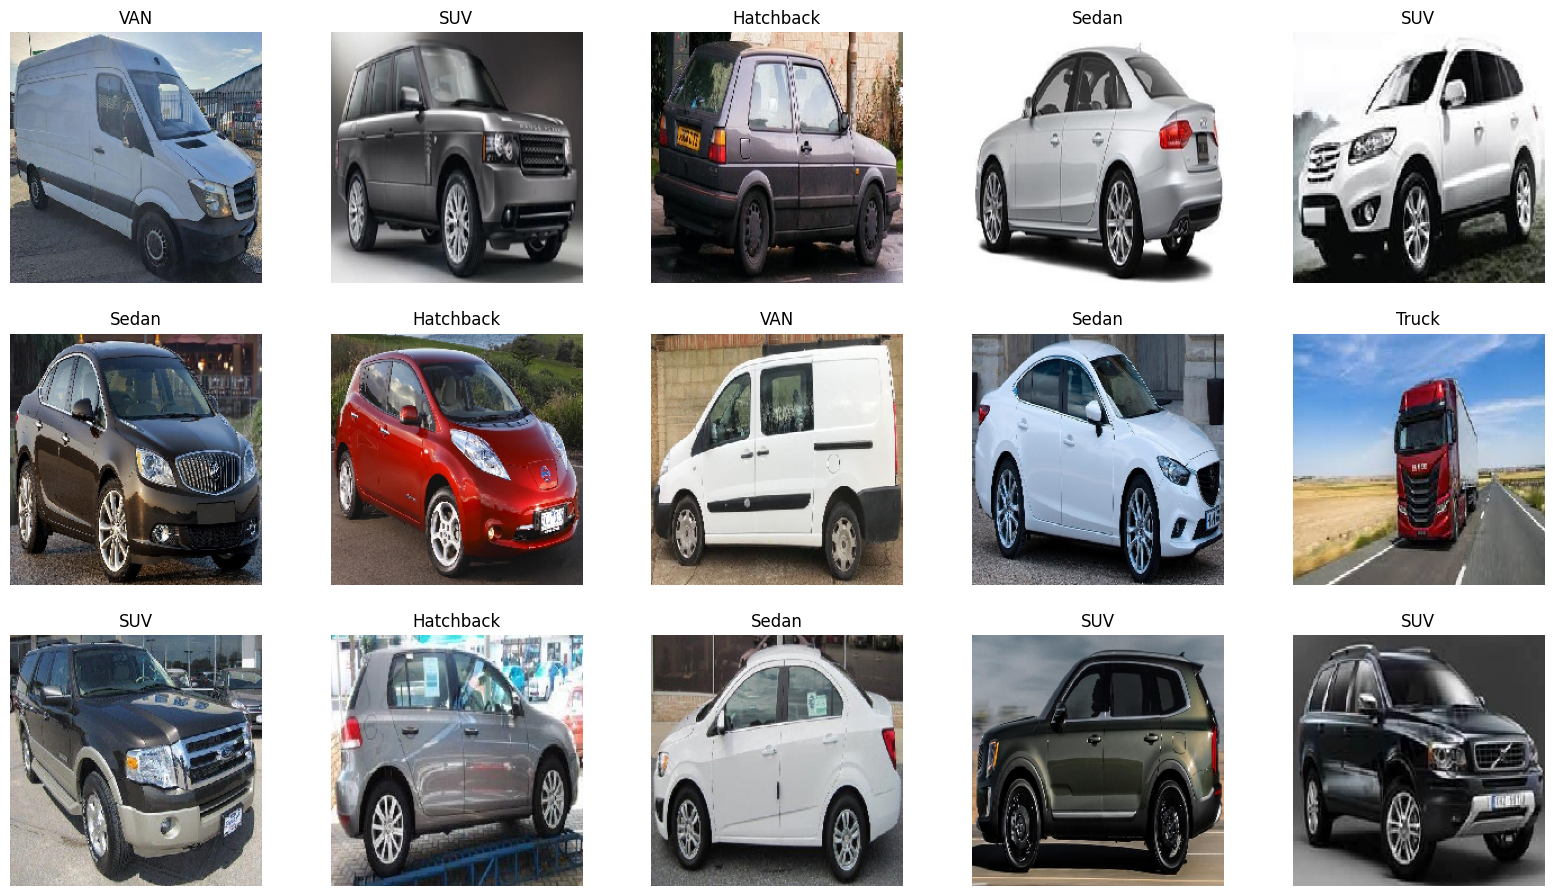

In [51]:
plt.figure(figsize=(20 ,15))
for image_batch, labels_batch in test:
    image = image_batch[1]
    for i in range(1, 16):
        plt.subplot(4, 5, i)
        plt.imshow(image_batch[i])
        label = class_labels[np.argmax(labels_batch[i])]
        plt.title(label)
        plt.axis("off")
    break
    plt.show()

In [87]:
class_names={}
for key,value in train.class_indices.items():
  class_names[value]=key
class_names

{0: 'Hatchback', 1: 'SUV', 2: 'Sedan', 3: 'Sport', 4: 'Truck', 5: 'VAN'}

In [32]:
model.save('cars2.h5')

In [33]:
load_model=tf.keras.models.load_model('cars2.h5')

# <a id="Import"></a>
# <p style="background-color: #686D76; font-family: 'Copperplate'; color:#F5F5F5; font-size:140%; text-align:center; border-radius:1000px 10px;"> Prediction </p> 

In [98]:
def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize if needed
    return img_array

def plot_image(predictions_array, true_label, img, class_names):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    # Prediction result
    predicted_label = np.argmax(predictions_array)
    print(predicted_label)
    color = 'blue' if predicted_label == true_label else 'red'

    # Show predicted and actual labels
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

# Update plot_value_array for single prediction array
def plot_value_array(predictions_array, true_label, class_names):
    plt.grid(False)
    plt.xticks(range(len(class_names)), list(class_names.values()), rotation=45)
    plt.yticks([])
    thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    # Color bars
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
[[2.5201391e-08 4.7537636e-08 1.3443541e-11 5.1755679e-12 2.3165828e-08
  9.9999988e-01]]
5


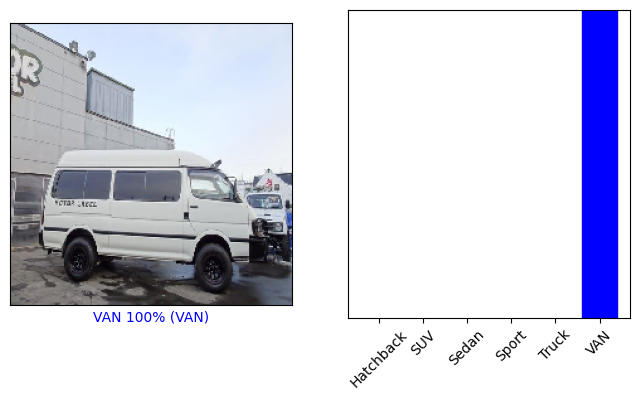

In [103]:
img_path='/kaggle/input/van-1/HIACE100CUSTOM - .jpeg'
img = preprocess_image(img_path, target_size=(224, 224)) 

predictions = model.predict(img) 
true_label = 5  
print(predictions)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_image(predictions[0], true_label, img[0], class_names)

plt.subplot(1, 2, 2)
plot_value_array(predictions[0], true_label, class_names)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
[[3.5163353e-08 1.2521090e-10 1.7819095e-09 1.0000000e+00 3.8935926e-09
  8.9542973e-10]]
3


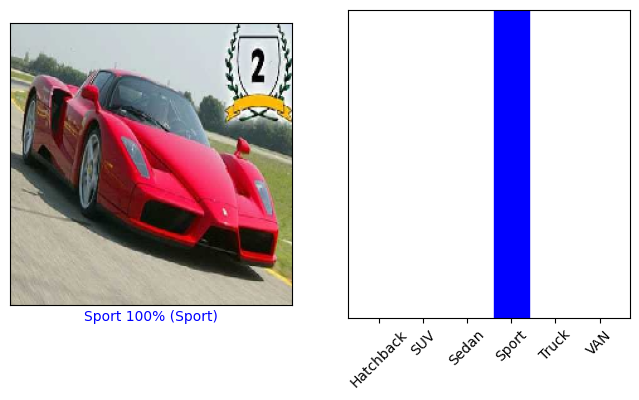

In [101]:

img_path2='/kaggle/input/sport-1/OQPODBZH2DCL.jpg'

img = preprocess_image(img_path2, target_size=(224, 224))  

predictions = model.predict(img)  
true_label = 3 
print(predictions)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_image(predictions[0], true_label, img[0], class_names)

plt.subplot(1, 2, 2)
plot_value_array(predictions[0], true_label, class_names)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
[[5.0884555e-03 3.8277682e-07 9.9491113e-01 3.4253839e-10 3.7555631e-12
  4.5752215e-11]]
2


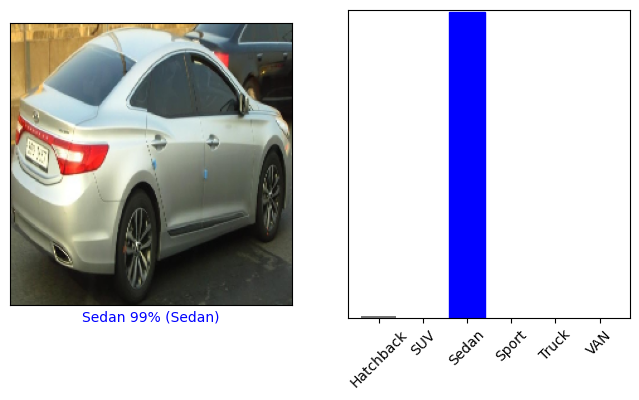

In [105]:

img_path2='/kaggle/input/sedan-1/07078_Hyundai-Azera-Sedan-2012_jpg.rf.881274c2ba4e3a1959cc271f32dc6eb1.jpg'

img = preprocess_image(img_path2, target_size=(224, 224)) 

predictions = model.predict(img)  
true_label = 2 
print(predictions)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_image(predictions[0], true_label, img[0], class_names)

plt.subplot(1, 2, 2)
plot_value_array(predictions[0], true_label, class_names)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
[[1.4460677e-13 5.0012144e-10 8.3957377e-14 1.6187879e-12 1.0000000e+00
  4.2585717e-09]]
4


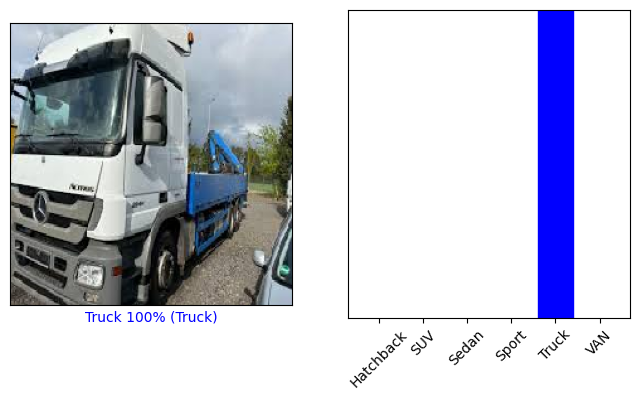

In [107]:

img_path2='/kaggle/input/truck-1/images-362.jpg'

img = preprocess_image(img_path2, target_size=(224, 224))  # Adjust size to your model's input shape

predictions = model.predict(img)  
true_label = 4
print(predictions)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_image(predictions[0], true_label, img[0], class_names)

plt.subplot(1, 2, 2)
plot_value_array(predictions[0], true_label, class_names)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
[[9.9873525e-01 2.4678843e-04 1.0166761e-03 7.6858075e-09 1.8387670e-12
  1.3070260e-06]]
0


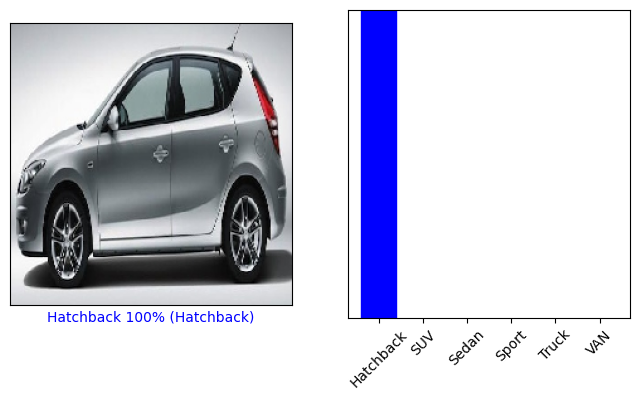

In [108]:

img_path2='/kaggle/input/hatchback1/06483_Hyundai-Elantra-Touring-Hatchback-2012_jpg.rf.89bd15e949d721b0113b49dc9e4e57b8.jpg'

img = preprocess_image(img_path2, target_size=(224, 224))  

predictions = model.predict(img)  
true_label = 0
print(predictions)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_image(predictions[0], true_label, img[0], class_names)

plt.subplot(1, 2, 2)
plot_value_array(predictions[0], true_label, class_names)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
[[1.6936891e-04 9.9982673e-01 3.7379766e-06 5.8722215e-12 5.6629093e-09
  2.2822255e-07]]
1


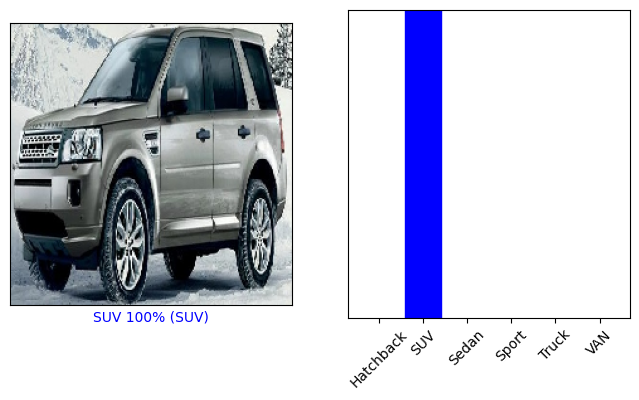

In [110]:

img_path2='/kaggle/input/suv-1/01896_Land-Rover-LR2-SUV-2012_jpg.rf.60b9a9943de29c9b533d17e99a4787e6.jpg'

img = preprocess_image(img_path2, target_size=(224, 224))  
predictions = model.predict(img)  
true_label = 1
print(predictions)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_image(predictions[0], true_label, img[0], class_names)

plt.subplot(1, 2, 2)
plot_value_array(predictions[0], true_label, class_names)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
[[1.2759730e-03 1.2647712e-07 9.9872392e-01 3.7996127e-11 4.9157092e-13
  2.8432055e-12]]
2


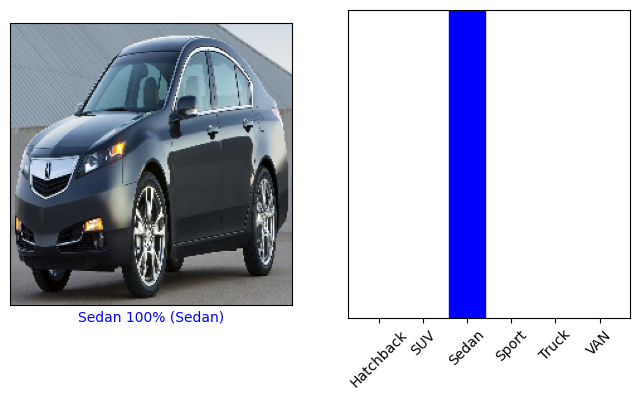

In [111]:

img_path2='/kaggle/input/sedan-2/01870_Acura-TL-Sedan-2012_jpg.rf.70606d47729abff212ef0e9aec0d555f.jpg'

img = preprocess_image(img_path2, target_size=(224, 224)) 

predictions = model.predict(img)  
true_label = 2 
print(predictions)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_image(predictions[0], true_label, img[0], class_names)

plt.subplot(1, 2, 2)
plot_value_array(predictions[0], true_label, class_names)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
[[7.7124680e-09 2.8032167e-11 2.8726299e-10 1.0000000e+00 1.0351981e-09
  2.3153794e-10]]
3


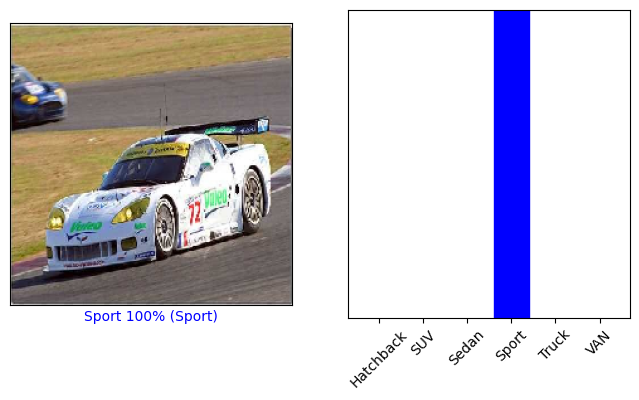

In [120]:
img_path2='/kaggle/input/fann55/09FVPA1TSGTY.jpg'

img = preprocess_image(img_path2, target_size=(224, 224))  

predictions = model.predict(img)  
true_label = 3 
print(predictions)
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_image(predictions[0], true_label, img[0], class_names)

plt.subplot(1, 2, 2)
plot_value_array(predictions[0], true_label, class_names)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
[[9.9787688e-01 8.6678605e-04 1.2361105e-03 6.0699335e-08 1.0266611e-10
  2.0052832e-05]]
0


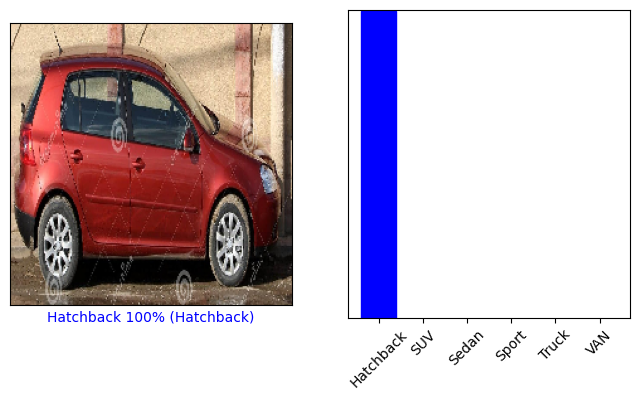

In [117]:
img_path2='/kaggle/input/hatchback-2/Image_51_jpg.rf.b19e9ee22f3a0aa9de5b931bef875433.jpg'

img = preprocess_image(img_path2, target_size=(224, 224))  # Adjust size to your model's input shape

predictions = model.predict(img)  
true_label = 0
print(predictions)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_image(predictions[0], true_label, img[0], class_names)

plt.subplot(1, 2, 2)
plot_value_array(predictions[0], true_label, class_names)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
[[1.3997917e-05 2.9069157e-05 1.7564572e-07 7.8407531e-08 2.0265808e-05
  9.9993646e-01]]
5


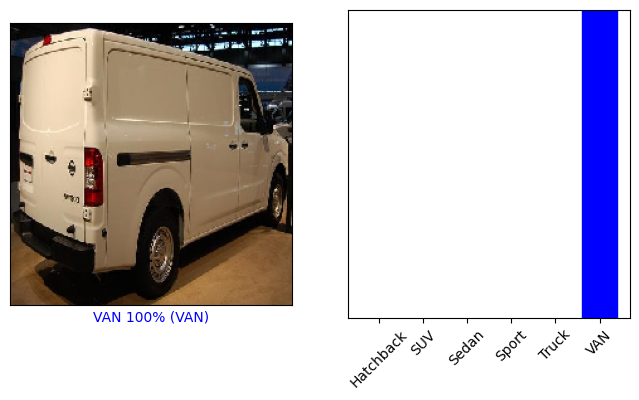

In [121]:
img_path='/kaggle/input/van-2/04734_Nissan-NV-Passenger-Van-2012_jpg.rf.b5812a68bb8df1889bf801c3e33d536a.jpg'
img = preprocess_image(img_path, target_size=(224, 224))  

predictions = model.predict(img) 
true_label = 5 
print(predictions)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plot_image(predictions[0], true_label, img[0], class_names)

plt.subplot(1, 2, 2)
plot_value_array(predictions[0], true_label, class_names)

plt.show()